In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()

In [51]:
pd.set_option('display.max_columns', None)

In [52]:
# REDAING DATASET
train_data = pd.read_excel('Data_Train.xlsx')

In [53]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [54]:
# GETTING BASIC INFO
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [55]:
# CHECKING FOR ANY NULL VALUES
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [56]:
# DROPPING NULL VALUES
train_data.dropna(inplace=True)

In [57]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## LET'S DO SOME FEATURE ENGINEERING

In [58]:
# LET'S EXTRACT DATE AND MONTH OF JOURNEY AND ADDING TWO NEW COLUMNS REPRESENTING JOURNEY DATE AND JOURNEY MONTH
train_data["Journey_date"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [59]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [60]:
# LET'S DROP DATE_OF_JOURNEY COLOUMN AS WE EXTRACTED NEEDED INFORMATION
train_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [61]:
# EXTRACTING HOUR OF DEPARTURE
train_data['Dep_Hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour
# EXTRACTING MINUTES OF DEPARTURE
train_data['Dep_Minute'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
# DROPPING DEP_TIME COLOUMN AS WE EXTRACTED NEEDED INFORMATION
train_data.drop(["Dep_Time"], axis=1,inplace=True)

In [62]:
train_data.head(4)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5


In [63]:
# EXTRACTING HOUR OF ARRIVAL
train_data["Arrival_Hour"] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
# EXTRACTING MINUTE OF ARRIVAL
train_data["Arrival_Min"] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
# DROPPING DEP_TIME COLOUMN AS WE EXTRACTED NEEDED INFORMATION
train_data.drop(['Arrival_Time'], axis=1, inplace=True)

In [64]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [65]:
duration = list(train_data['Duration']) #making list of DURATION column
for i in range(len(duration)):
    if len(duration[i].split()) != 2: #checking if duration is only in hours or minutes
        if "h" in duration[i]:        #if it's only in hours it'll contain only "h" 
            duration[i]= duration[i].strip() + " 0m" # adding 0m to it example: 7h 0m
        else:
            duration[i]= "0h " + duration[i] #adding 0h to it example: 0h 58m


In [66]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) #creating a separate list of hours
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) #creating separate list of minutes

In [67]:
# ADDING DURATION_HOURS AND DURATION_MIN IN DASTASET
train_data['duration_hours'] = duration_hours
train_data['duration_mins']  = duration_mins

In [68]:
# DROPPING DEP_TIME COLOUMN AS WE EXTRACTED NEEDED INFORMATION
train_data.drop(['Duration'], axis=1,inplace=True)

In [69]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


### MIXING EDA WITH BIT OF FEATURE ENGINEERING
**Handling Categorical Data**

In [70]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

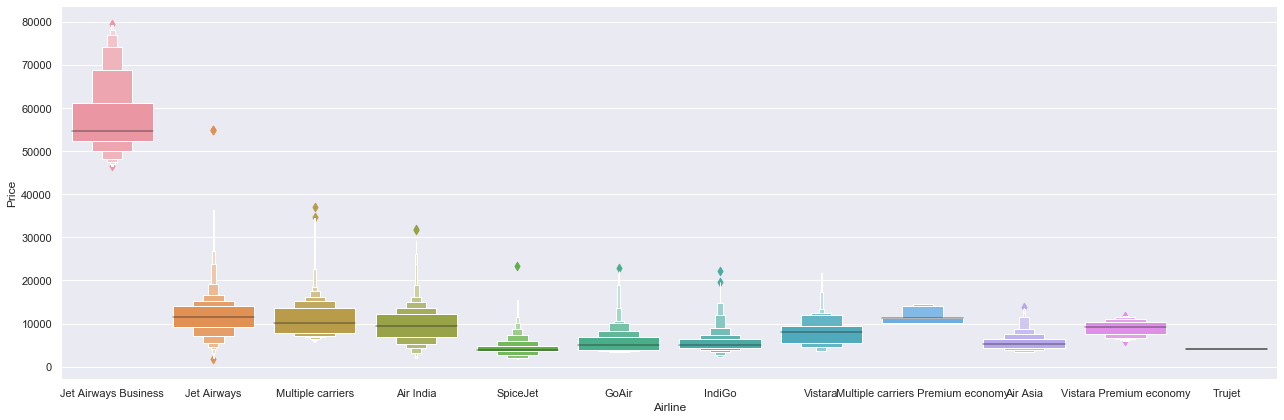

In [71]:
# LET'S VISUALIZE FARE PRICE WITH DIFFERENT AIRLINES
sns.catplot(y="Price",x="Airline", data=train_data.sort_values('Price',ascending=False), kind='boxen', height=6, aspect=3)

In [72]:
# CREATING DUMMY VARIABLES FOR AIRLINES
Airline = train_data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [73]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

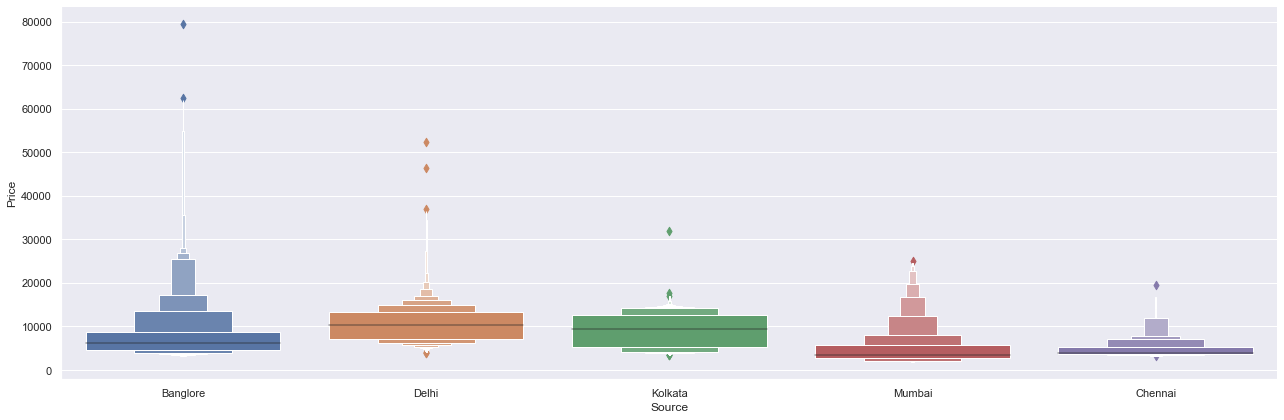

In [74]:
# LET'S VISUALIZE FARE PRICE WITH SOURCE
sns.catplot(y='Price',x='Source', data=train_data.sort_values('Price', ascending=False), kind='boxen',height=6,aspect=3)

In [75]:
# CREATING DUMMY VARIABLES FOR SOURCE
Source = train_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [76]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

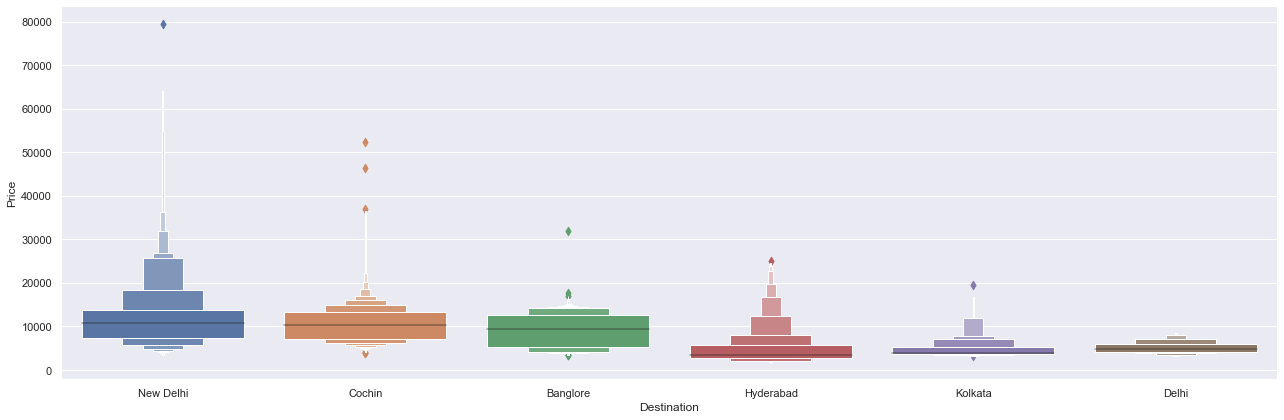

In [77]:
# LET'S VISUALIZE FARE PRICE WITH DESTINATION
sns.catplot(y='Price',x='Destination', data=train_data.sort_values('Price', ascending=False), kind='boxen',height=6,aspect=3)

In [78]:
# CREATING DUMMY VARIABLES FOR DESTINATION
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [79]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [80]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
# so dropping them

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [81]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25


In [82]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

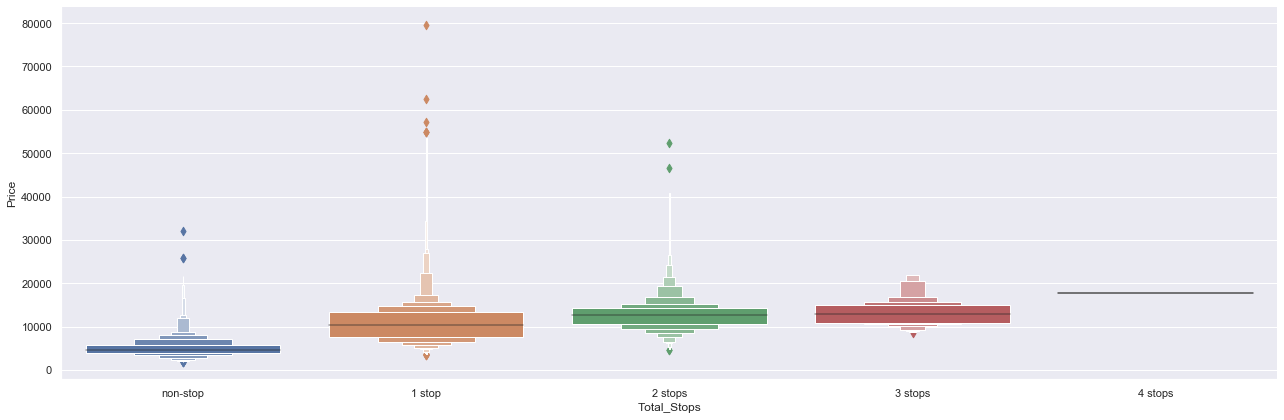

In [83]:
# LET'S VISUALIZE FARE PRICE WITH Total_Stops
sns.catplot(y='Price',x='Total_Stops', data=train_data.sort_values('Price',ascending=True), kind='boxen',height=6,aspect=3)

In [84]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [85]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [86]:
# Concatenating dummy columns to dataset
data_train = pd.concat([train_data,Airline,Source,Destination], axis=1)

In [87]:
# DROPPING THESE THREE COLUMNS
data_train.drop(['Airline','Source','Destination'], axis=1, inplace=True)

In [88]:
data_train.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [89]:
data_train.shape

(10682, 30)

# Test Set

In [90]:
# READING TEST DATASET
test_data = pd.read_excel('Test_set.xlsx')

In [91]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [92]:
# Preprocessing
# REPEATING ALL THE FEATURE ENGINEERING DONE TO THE TRAIN DATASET

In [93]:
test_data.dropna(inplace=True)
test_data.isnull().sum()
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis=1, inplace=True)
# Extracting hour
test_data['Dep_Hour'] = pd.to_datetime(test_data.Dep_Time).dt.hour
# Extracting Minutes
test_data['Dep_Minute'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
# Dropping Dep_Time
test_data.drop(["Dep_Time"], axis=1,inplace=True)
test_data["Arrival_Hour"] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data["Arrival_Min"] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(['Arrival_Time'], axis=1, inplace=True)
duration = list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2: #checking if duration is only in hours or minutes
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
# Adding duration_hours an duration_min in dastaset
test_data['duration_hours'] = duration_hours
test_data['duration_mins']  = duration_mins
test_data.drop(['Duration'], axis=1,inplace=True)
Airline = test_data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Source = test_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
test_data['Total_Stops'].value_counts()
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
data_test = pd.concat([test_data,Airline,Source,Destination], axis=1)
data_test.drop(['Airline','Source','Destination'], axis=1, inplace=True)
print()
print()

In [94]:
print("Shape of test data : ", data_test.shape)

Shape of test data :  (2671, 28)


In [95]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**
**feature_importance_**
**SelectKBest**

In [97]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Min', 'duration_hours',
       'duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [99]:
# ASSIGNING COLUMNS TO X
X = data_train.loc[:,['Total_Stops', 'Journey_date', 'Journey_month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Min', 'duration_hours',
       'duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [102]:
# ASSIGNING TARGET COLUMN TO y
y = data_train.iloc[:,1]

In [103]:
# TAKING A GLIMPSE
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

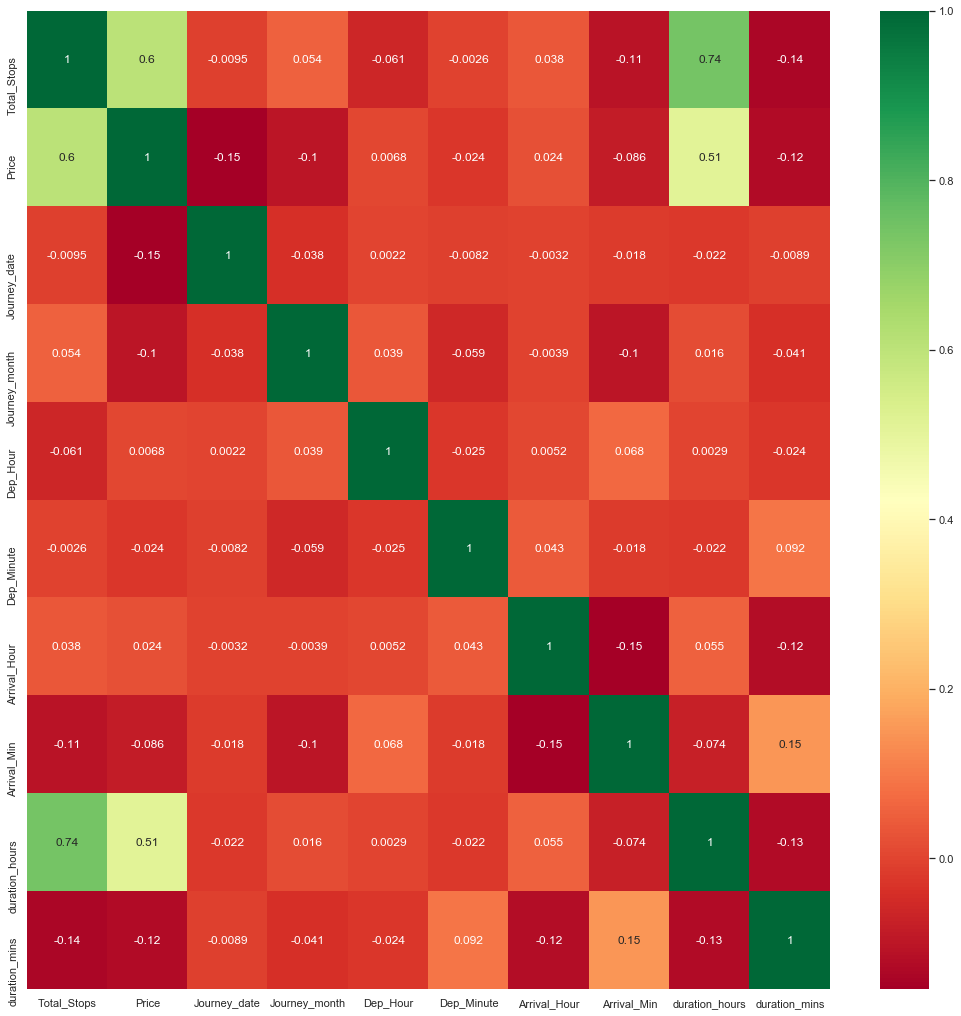

In [104]:
# CORRELATION BETWEEN INDEPENDENT AND DEPENDENT ATTRIBUTES

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [105]:
# FEATURE IMPORTANCE USING ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [106]:
print(selection.feature_importances_)

[2.45185545e-01 1.44521085e-01 5.28941721e-02 2.43620280e-02
 2.17371255e-02 2.74625132e-02 1.95660161e-02 1.03333893e-01
 1.71220153e-02 1.08527927e-02 1.84322729e-03 1.64914337e-02
 1.36902173e-01 6.72759307e-02 1.93810698e-02 8.59100724e-04
 3.06943916e-03 1.00505489e-04 5.32386866e-03 8.82795490e-05
 3.69181459e-04 1.05771493e-02 3.45676416e-03 7.84766273e-03
 1.11550572e-02 1.63075561e-02 6.87535130e-03 4.93727276e-04
 2.45453360e-02]


<function matplotlib.pyplot.show(*args, **kw)>

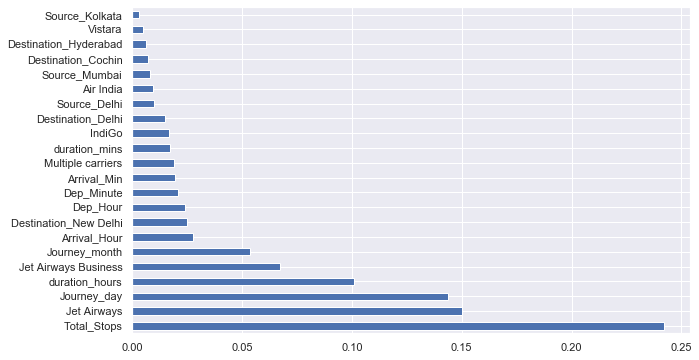

In [54]:
# PLOT GRAPH OF FEATURE IMPORTANCE FOR BETTER VISUALIZATION

plt.figure(figsize=(10,6))
important_feat = pd.Series(selection.feature_importances_, index = X.columns)
important_feat.nlargest(22).plot(kind='barh')
plt.show

# Fitting model using Random Forest

In [118]:
# SPLIT DATASET INTO TRAIN AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [119]:
# SCALING IS NOT DONE IN RANDOM FOREST
# IMPORT MODEL
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
# FIT THE DATA
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [120]:
# PREDICT W.R.T X_TEST
y_pred = rf_reg.predict(X_test)

In [121]:
rf_reg.score(X_train,y_train)

0.9556309143001629

In [122]:
rf_reg.score(X_test,y_test)

0.8195614560150386

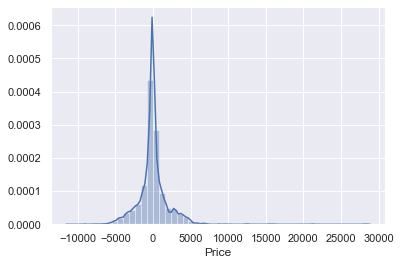

In [123]:
# PLOT GRAPH
sns.distplot(y_test-y_pred)
plt.show()

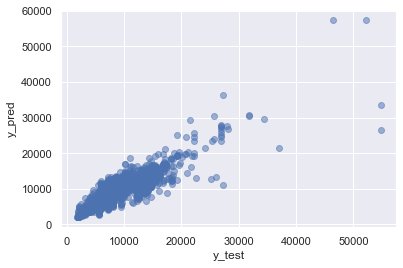

In [124]:
# PLOT GRAPH
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [125]:
from sklearn import metrics

In [130]:
# CHECK SCORES
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1206.2137791273267
MSE:  4070566.15617257
RMSE:  2017.5644119017786


In [131]:
metrics.r2_score(y_test, y_pred)

0.8195614560150386

## Hyperparameter Tuning

In [132]:
# IMPORTING RANDOMIZEDSEARCHCV
from sklearn.model_selection import RandomizedSearchCV

In [133]:
# RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
max_features = ['auto', 'sqrt']
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [134]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [135]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
CV_rf_reg = RandomizedSearchCV(estimator=rf_reg, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=0,n_jobs=1)

In [136]:
# NOW FIT TRAIN DATA
CV_rf_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=   4.9s
[CV] n_estimators=400, min_samples_split=

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=500, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [139]:
# LOOKING FOR BEST PARAMS
CV_rf_reg.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [140]:
# DOING PREDICTION WRT X_TEST
predictions = CV_rf_reg.predict(X_test)

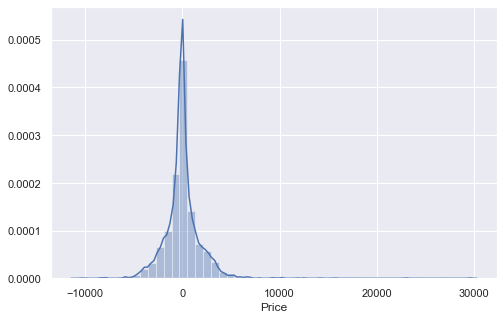

In [141]:
# PLOT GRAPH
plt.figure(figsize=(8,5))
sns.distplot(y_test-predictions)
plt.show()

In [142]:
# CHECKING SCORES AGAIN
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  1166.5617879876208
MSE:  3725573.6753782546
RMSE:  1930.1745194096452


In [ ]:
# WE CAN SEE SOME MAJOR IMPROVEMENTS IN RMSE AFTER HYPERPARAMETER TUNING 

### Save the model to reuse it again

In [143]:
import pickle
# open a file, where you want to store the data
file = open('rf_flight.pkl', 'wb')

# dump information to that file
pickle.dump(CV_rf_reg, file)

In [144]:
# TESTING IF MODEL IS WORKING
model = open('rf_flight.pkl','rb')
forest = pickle.load(model)

In [145]:
y_prediction = forest.predict(X_test)

In [146]:
metrics.r2_score(y_test,y_prediction)

0.8348541545075789

In [147]:
# MODEL IS SAVE IN PICKLE FILE AND WORKING